In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt

In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


# **8:1:1**

In [3]:
df = pd.read_csv("ETH.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1899,2928.701904
1900,2949.359619
1901,2881.157959
1902,3037.056641


In [4]:
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))
print("Validate data size:", len(val_data))

Train data size: 1523
Test data size: 190
Validate data size: 191


In [5]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17904.523, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17906.096, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17900.934, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17901.171, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17904.348, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17902.709, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17902.815, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17903.466, Time=1.55 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17899.223, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=17900.991, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17901.099, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17899.460, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=17901.718, Time=0.41 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.600 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [7]:
# Đánh giá độ chính xác
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1090.635479444198
Testing RMSE: 134.69655867191267
Validation MAE: 928.8690883511853
Testing MAE: 103.19361313799003
Validation MAPE: 30.781549603650355
Testing MAPE: 6.152044432911162


Close price of ETH for the next 30 days:
[1835.02721702 1834.81730717 1834.83164853 1834.8306687  1834.83073565
 1834.83073107 1834.83073139 1834.83073136 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137]


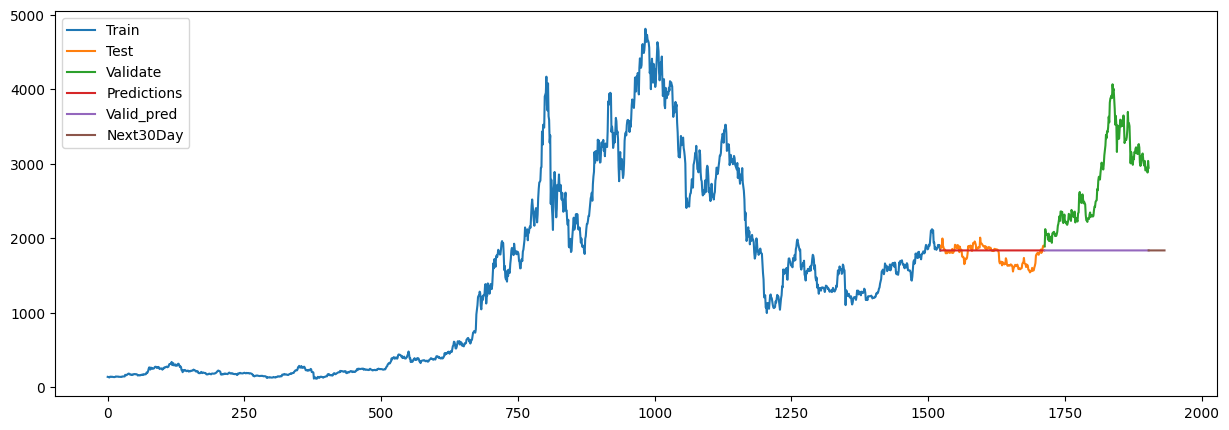

In [8]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Close price of ETH for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next30Day'])
plt.show()

Close price of ETH for the next 60 days:
[1835.02721702 1834.81730717 1834.83164853 1834.8306687  1834.83073565
 1834.83073107 1834.83073139 1834.83073136 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137]


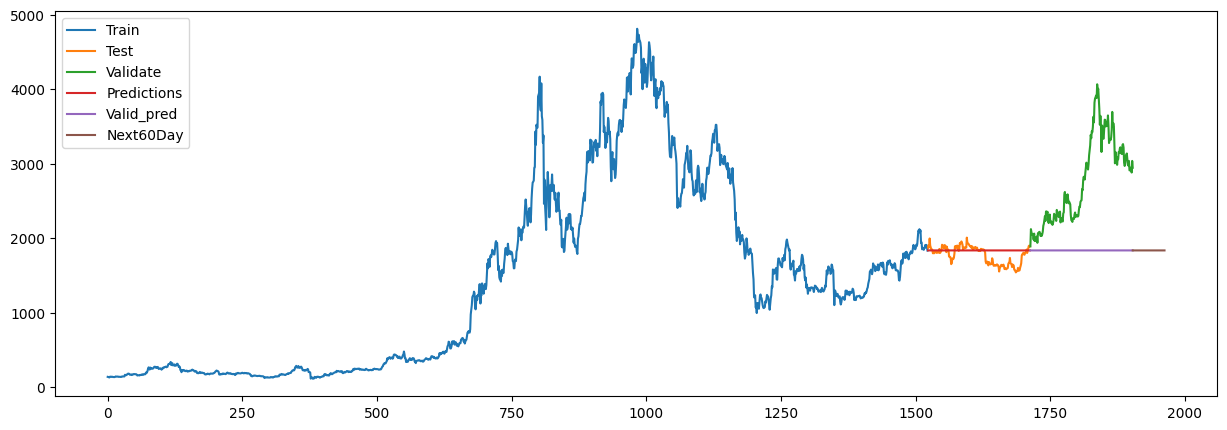

In [9]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Close price of ETH for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next60Day'])
plt.show()

Close price of ETH for the next 90 days:
[1835.02721702 1834.81730717 1834.83164853 1834.8306687  1834.83073565
 1834.83073107 1834.83073139 1834.83073136 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83073137 1834.83073137 1834.83073137
 1834.83073137 1834.83073137 1834.83

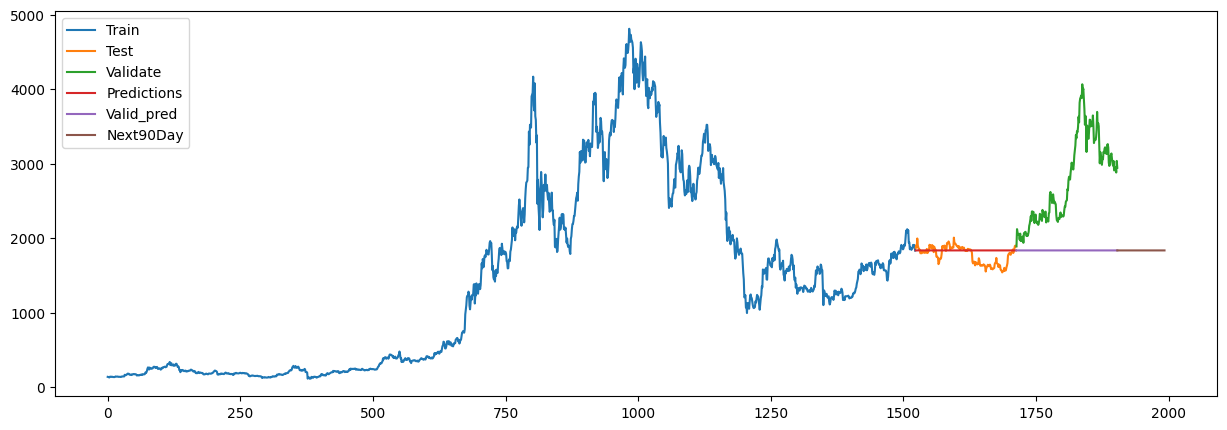

In [10]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Close price of ETH for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next90Day'])
plt.show()

# **7:2:1**

In [11]:
df = pd.read_csv("ETH.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1899,2928.701904
1900,2949.359619
1901,2881.157959
1902,3037.056641


In [12]:
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))
print("Validate data size:", len(val_data))

Train data size: 1332
Test data size: 380
Validate data size: 192


In [13]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15773.317, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15774.609, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15769.826, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15770.098, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15772.737, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15771.503, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15771.645, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15772.224, Time=1.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15767.973, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=15769.645, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15769.788, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15768.244, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=15770.351, Time=0.42 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.413 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [15]:
# Đánh giá độ chính xác
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1555.4035323841995
Testing RMSE: 408.8447051708629
Validation MAE: 1445.795238755495
Testing MAE: 365.49347576099495
Validation MAPE: 50.350245308585265
Testing MAPE: 20.975332228211226


Close price of ETH for the next 30 days:
[1313.27771111 1313.35040972 1313.34523578 1313.34560401 1313.3455778
 1313.34557967 1313.34557953 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954]


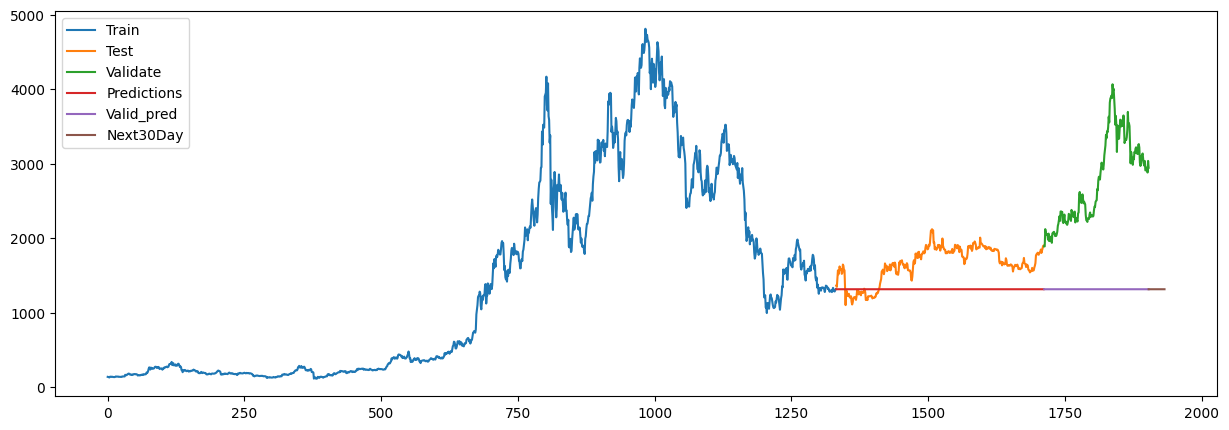

In [16]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Close price of ETH for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next30Day'])
plt.show()

Close price of ETH for the next 60 days:
[1313.27771111 1313.35040972 1313.34523578 1313.34560401 1313.3455778
 1313.34557967 1313.34557953 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954]


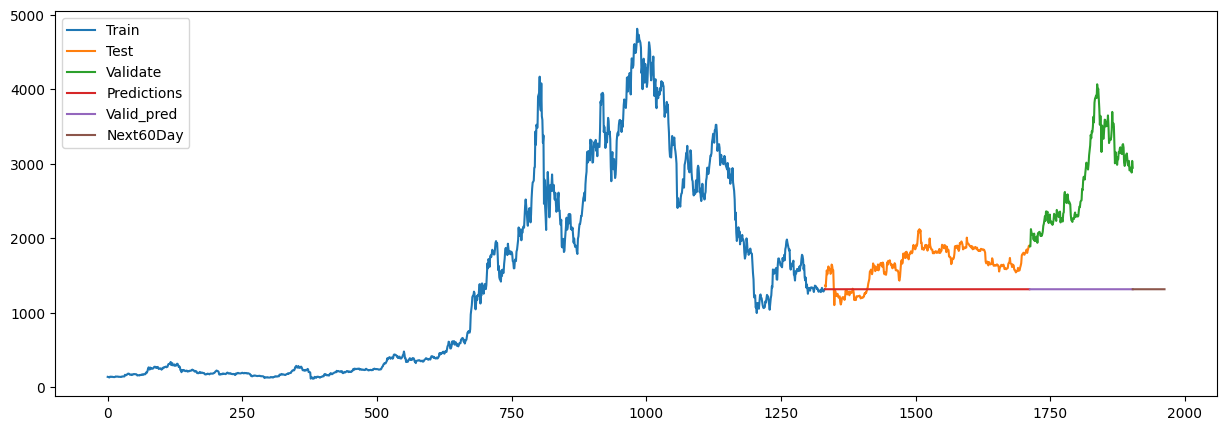

In [17]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Close price of ETH for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next60Day'])
plt.show()

Close price of ETH for the next 90 days:
[1313.27771111 1313.35040972 1313.34523578 1313.34560401 1313.3455778
 1313.34557967 1313.34557953 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.34557954 1313.34557954 1313.34557954
 1313.34557954 1313.34557954 1313.345

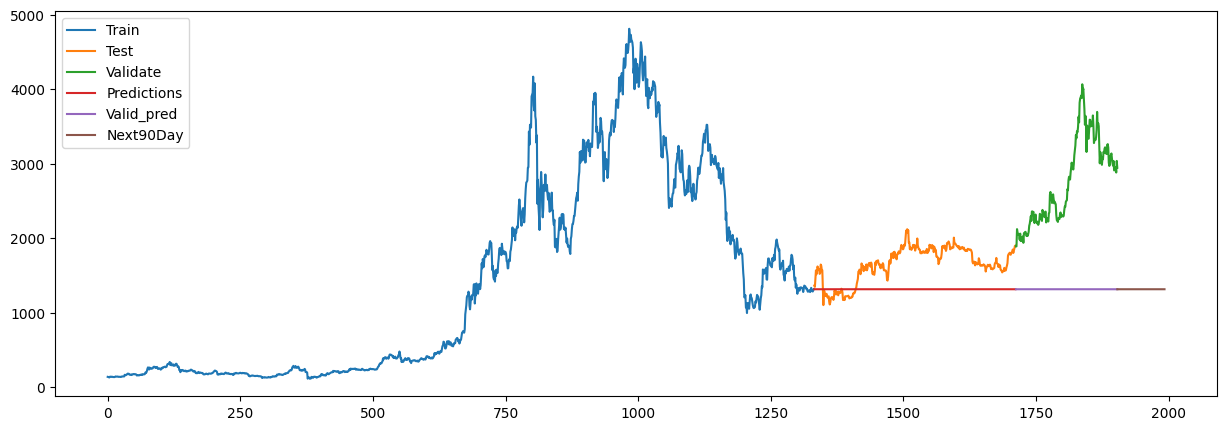

In [18]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Close price of ETH for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next90Day'])
plt.show()

# **6:2:2**

In [19]:
df = pd.read_csv("ETH.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1899,2928.701904
1900,2949.359619
1901,2881.157959
1902,3037.056641


In [20]:
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))
print("Validate data size:", len(val_data))

Train data size: 1142
Test data size: 380
Validate data size: 382


In [21]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13551.644, Time=3.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13562.807, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13558.833, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13558.912, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13561.679, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13562.191, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13562.834, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13553.284, Time=2.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13538.151, Time=3.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13559.640, Time=3.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13551.129, Time=3.24 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13540.380, Time=3.77 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13551.226, Time=2.45 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=13547.815, Time=6.08 sec
 ARIMA(2,1,3)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [22]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [23]:
# Đánh giá độ chính xác
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1005.5552028639516
Testing RMSE: 1484.915587086116
Validation MAE: 907.0022847135222
Testing MAE: 1425.0189282432002
Validation MAPE: 47.292356517939005
Testing MAPE: 98.9523844983718


Close price of ETH for the next 30 days:
[3039.61355793 3030.84728028 3047.82056129 3024.73668863 3051.51195562
 3023.56090527 3050.29064935 3026.8739635  3045.3369298  3032.92102803
 3038.78686428 3039.39290686 3032.91823441 3044.22769186 3029.42612325
 3046.20502834 3028.99648646 3045.18401962 3031.26019696 3041.96987239
 3035.0794188  3037.91111851 3039.02374157 3034.39551819 3041.85843038
 3032.41641783 3042.89250084 3032.33152355 3042.10241433 3033.85684941]


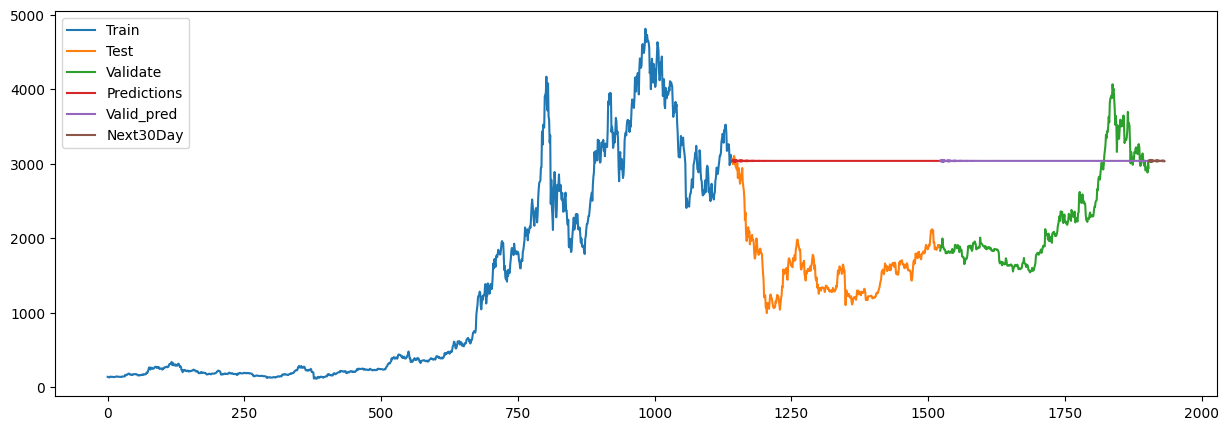

In [24]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Close price of ETH for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next30Day'])
plt.show()

Close price of ETH for the next 60 days:
[3039.61355793 3030.84728028 3047.82056129 3024.73668863 3051.51195562
 3023.56090527 3050.29064935 3026.8739635  3045.3369298  3032.92102803
 3038.78686428 3039.39290686 3032.91823441 3044.22769186 3029.42612325
 3046.20502834 3028.99648646 3045.18401962 3031.26019696 3041.96987239
 3035.0794188  3037.91111851 3039.02374157 3034.39551819 3041.85843038
 3032.41641783 3042.89250084 3032.33152355 3042.10241433 3033.85684941
 3040.03004972 3036.25920017 3037.52331638 3038.65542906 3035.42502316
 3040.30886321 3034.31425613 3040.83210642 3034.37128474 3040.24911465
 3035.38736065 3038.92047437 3036.89267078 3037.37728334 3038.34371016
 3036.12973675 3039.30266393 3035.5134867  3039.55488429 3035.61488852
 3039.13843242 3036.28523145 3038.29098775 3037.22500414 3037.34399711
 3038.10078792 3036.60528776 3038.65345049 3036.26817022 3038.76575717]


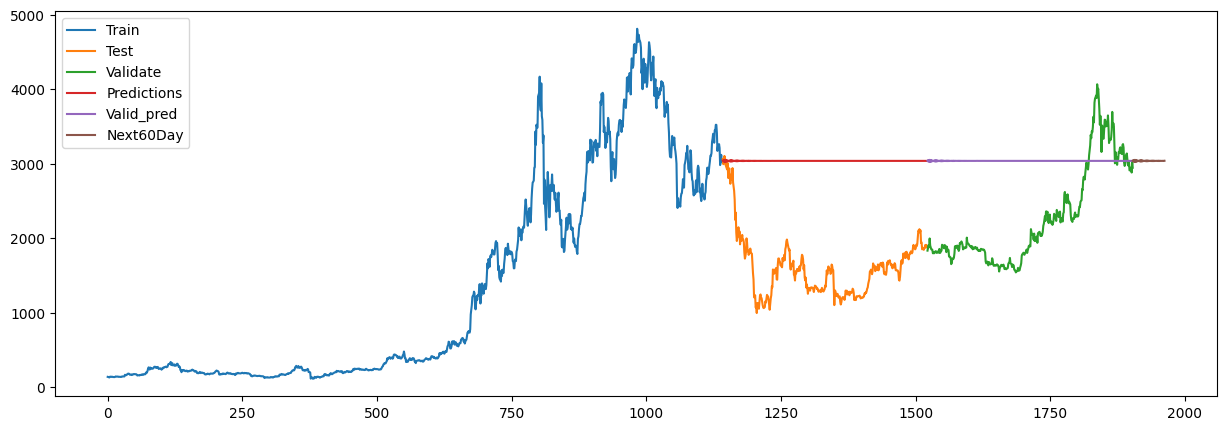

In [25]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Close price of ETH for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next60Day'])
plt.show()

Close price of ETH for the next 90 days:
[3039.61355793 3030.84728028 3047.82056129 3024.73668863 3051.51195562
 3023.56090527 3050.29064935 3026.8739635  3045.3369298  3032.92102803
 3038.78686428 3039.39290686 3032.91823441 3044.22769186 3029.42612325
 3046.20502834 3028.99648646 3045.18401962 3031.26019696 3041.96987239
 3035.0794188  3037.91111851 3039.02374157 3034.39551819 3041.85843038
 3032.41641783 3042.89250084 3032.33152355 3042.10241433 3033.85684941
 3040.03004972 3036.25920017 3037.52331638 3038.65542906 3035.42502316
 3040.30886321 3034.31425613 3040.83210642 3034.37128474 3040.24911465
 3035.38736065 3038.92047437 3036.89267078 3037.37728334 3038.34371016
 3036.12973675 3039.30266393 3035.5134867  3039.55488429 3035.61488852
 3039.13843242 3036.28523145 3038.29098775 3037.22500414 3037.34399711
 3038.10078792 3036.60528776 3038.65345049 3036.26817022 3038.76575717
 3036.37067673 3038.47522986 3036.80927532 3037.93725912 3037.39391895
 3037.35796996 3037.92071546 3036.92

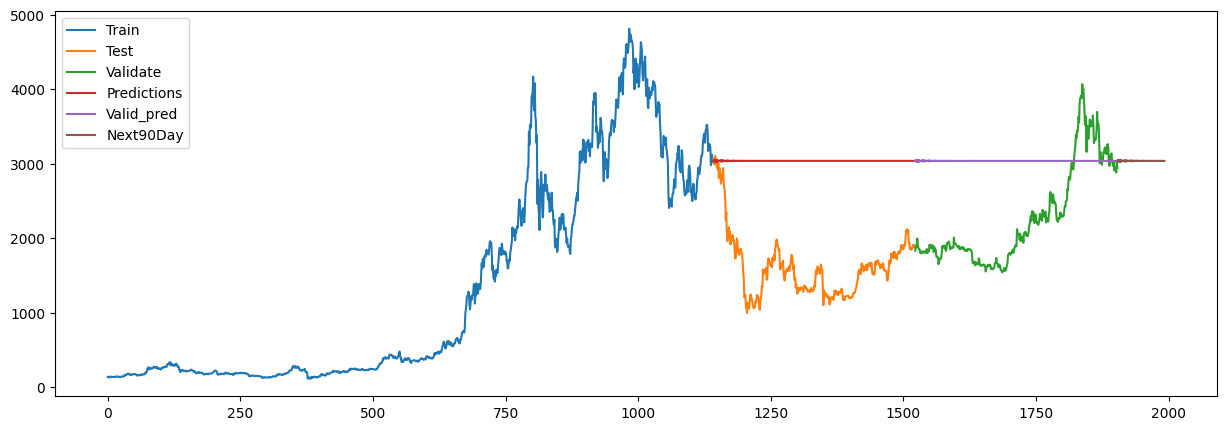

In [26]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Close price of ETH for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next90Day'])
plt.show()